In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('sab-bma.csv')


In [3]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCATTCCACGTTC...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCACAAAATAGGTTGGTCCTCCGTTCTATCTA...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGA...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAATGGCGGAGTAAAGCGTGT...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGGGCTGAGCGCCATTTTGTT...
...,...,...
9995,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
9996,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTAT...
9997,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...
9998,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGCATAATGAAACGACAACCTGCTCGTCGC...


In [4]:
from tqdm import tqdm


In [5]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [6]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [7]:
import difflib


In [8]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]


            
        
    #print('')


In [9]:
pairs = []
pairs_no_pos = []


for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff(ref_strands[i], noisy_strands[i])


100%|██████████| 10000/10000 [00:15<00:00, 658.30it/s]


In [10]:
import numpy as np


In [11]:
subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

In [12]:
for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)

CCC ->  6
TGCG ->  6
CAC ->  6
CC -> T 6
 -> CTCA 6
GA -> CC 6
TTG -> C 6
CG -> TA 6
TGG -> A 6
 -> CACG 6
G -> ATT 6
GGT -> C 6
T -> GAC 6
GCTT ->  6
 -> GAGA 6
TGAC ->  6
CTTG ->  6
CTTA ->  6
 -> CGGT 6
T -> GCG 6
T -> CCG 6
T -> CCCA 6
G -> TT 6
T -> CCC 6
CTCG ->  6
TT -> CC 6
 -> CTAA 6
G -> CTA 6
TA -> CG 6
TTGC ->  6
ATGC ->  6
GC -> TA 6
ATTG ->  6
AAG ->  6
T -> GGC 6
T -> AGC 6
TCG -> A 7
 -> AGAA 7
TCTG ->  7
 -> GAAG 7
TTCA ->  7
 -> AATC 7
GTAC ->  7
GTA -> C 7
 -> TACC 7
 -> CCCC 7
 -> CCAA 7
TAG -> C 7
 -> TGCA 7
TTGG ->  7
ATA ->  7
CAA ->  7
GC -> AT 7
GAT -> C 7
 -> CGAA 7
 -> AACC 7
CTGT ->  7
T -> ACC 7
TAA ->  7
TA -> CC 7
 -> AGTA 7
AA -> C 7
T -> GAAA 7
CTG -> A 7
GA -> CT 7
 -> AAAC 7
CGGT ->  7
CGT -> AA 7
 -> GCGG 7
CCT -> A 8
 -> GAAA 8
CCG ->  8
G -> AAC 8
 -> AAGA 8
CC -> AA 8
CGA ->  8
 -> GTAC 8
GG -> CC 8
CC -> G 8
CCA ->  8
GGT -> A 8
GGTT ->  8
TC -> AG 8
 -> AGGA 8
GTAT ->  8
 -> CAAC 8
T -> ACG 8
T -> CCA 8
 -> CAAA 8
T -> CAG 8
AA -> T 9
AAC ->  9


In [13]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [14]:
for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)


 -> ACA @ 56 6
C -> G @ 48 6
GC ->  @ 70 6
 -> GC @ 46 6
C -> G @ 42 6
TA ->  @ 30 6
G -> AA @ 56 6
A -> C @ 18 6
 -> GC @ 53 6
C -> G @ 33 6
C -> G @ 32 6
T -> CC @ 54 6
 -> T @ 105 6
 -> GAC @ 55 6
C -> AT @ 54 6
TT ->  @ 80 6
TT ->  @ 81 6
TA ->  @ 32 6
GG ->  @ 43 6
T -> AG @ 54 6
A -> C @ 39 6
C -> G @ 59 6
TG ->  @ 68 6
GA ->  @ 55 6
G -> T @ 59 6
 -> AAT @ 55 6
 -> CG @ 52 6
TT ->  @ 40 6
 -> TA @ 53 6
AT ->  @ 65 6
AT ->  @ 73 6
C -> G @ 80 6
AT ->  @ 74 6
A -> C @ 82 6
G -> T @ 76 6
GC ->  @ 51 6
 -> AC @ 41 6
T -> G @ 5 6
 -> AC @ 59 6
 -> AC @ 66 6
GC ->  @ 57 6
 -> GCC @ 53 6
TT ->  @ 53 6
 -> CA @ 51 6
GG ->  @ 47 6
G -> T @ 77 6
G -> T @ 61 6
A -> C @ 41 6
GG ->  @ 55 6
A -> C @ 63 6
TA ->  @ 45 6
GT ->  @ 84 6
CT ->  @ 54 6
GT ->  @ 38 6
C -> A @ 109 6
GT ->  @ 72 6
A -> C @ 72 6
A -> C @ 73 6
TC ->  @ 97 6
A -> C @ 91 6
TC ->  @ 88 6
GT ->  @ 68 6
 -> G @ 106 6
GT ->  @ 66 6
TC ->  @ 71 6
TC ->  @ 55 6
TC ->  @ 66 6
 -> G @ 109 6
GT ->  @ 49 6
TC ->  @ 60 6
 -> CTG @ 55

In [15]:
import matplotlib.pyplot as plt

In [16]:
strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

[47, 144, 184, 195, 238, 247, 268, 285, 312, 291, 311, 346, 374, 364, 381, 436, 419, 424, 455, 469, 437, 485, 503, 458, 468, 516, 516, 528, 537, 586, 621, 573, 608, 609, 582, 615, 626, 627, 617, 628, 703, 662, 676, 695, 700, 688, 731, 705, 762, 725, 754, 796, 914, 1146, 1599, 2536, 1903, 1314, 963, 873, 750, 756, 661, 749, 681, 688, 662, 693, 641, 643, 724, 642, 658, 616, 622, 625, 598, 599, 638, 598, 561, 578, 567, 550, 579, 514, 481, 508, 495, 460, 486, 471, 448, 422, 425, 418, 409, 392, 391, 402, 360, 304, 305, 296, 267, 295, 231, 239, 209, 150, 149]


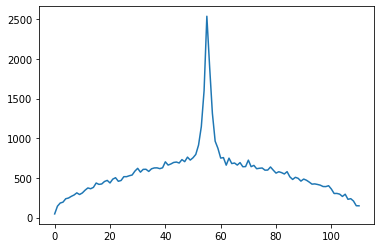

In [17]:
plt.plot(range(strand_len + 1), pos_counts)

In [18]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

print(pos_map['_ -> T'])

[6, 4, 4, 7, 9, 6, 4, 12, 19, 7, 11, 8, 9, 9, 19, 15, 10, 11, 24, 11, 16, 14, 13, 13, 16, 20, 13, 8, 11, 19, 16, 16, 17, 12, 15, 16, 26, 10, 21, 17, 18, 12, 24, 20, 16, 18, 21, 14, 20, 31, 20, 18, 22, 42, 80, 203, 107, 46, 23, 27, 24, 18, 24, 19, 23, 16, 17, 9, 20, 12, 22, 14, 13, 15, 18, 14, 23, 18, 23, 9, 11, 9, 17, 13, 14, 16, 14, 10, 18, 14, 20, 6, 15, 14, 13, 8, 12, 18, 13, 8, 13, 7, 7, 11, 4, 6, 11, 7, 7, 5, 0]


In [19]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


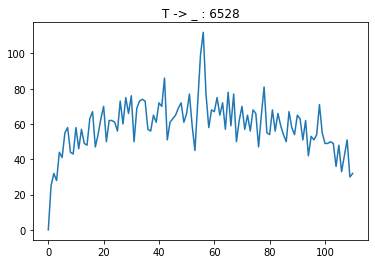

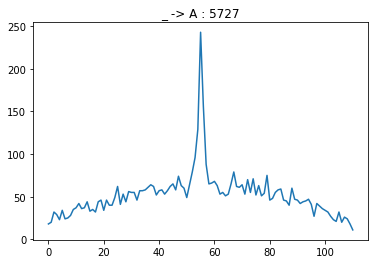

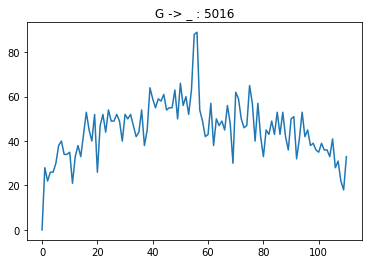

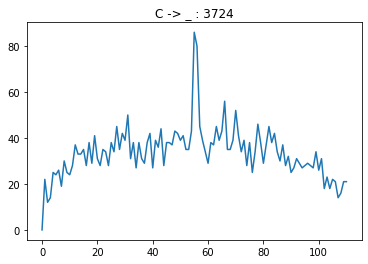

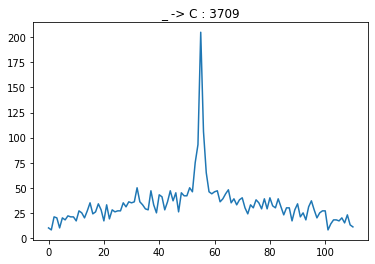

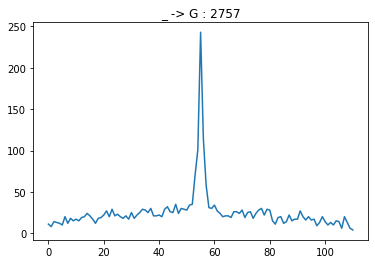

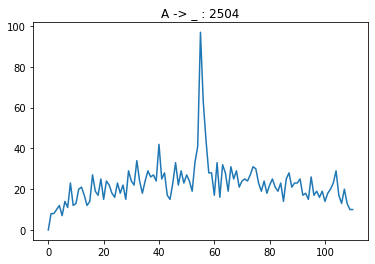

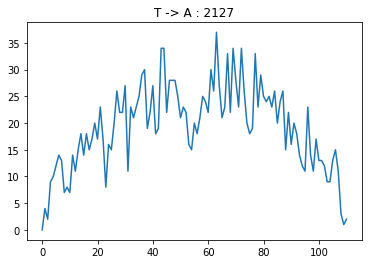

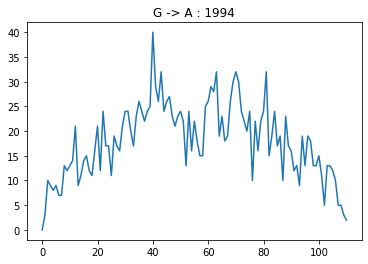

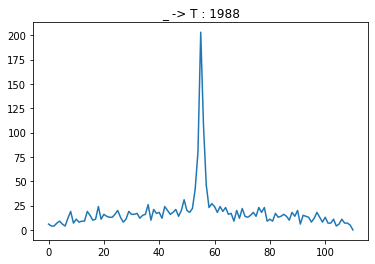

In [20]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    plt.title(f'{key} : {count}')
    plt.plot(range(strand_len + 1), pos_map[key])

In [21]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)